In [1]:
import pickle
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt
from pathlib import Path
from spice.spectrum import AB_passband_luminosity
from spice.spectrum.filter import Bolometric, GaiaG, GaiaRP, GaiaBP

# Load the pickle files
with open("data/tz_fornacis_close.pkl", "rb") as f:
    data = pickle.load(f)

In [2]:
data.keys()

dict_keys(['spectra_body1', 'spectra_body2', 'mesh_body1', 'mesh_body2', 'wavelengths', 'times'])

In [3]:
gaia_g = GaiaG()
gaia_rp = GaiaRP()
gaia_bp = GaiaBP()
bol = Bolometric()

In [4]:
times = data['times']
pb1 = data['mesh_body1']
pb2 = data['mesh_body2']
spectra1 = data['spectra_body1']
spectra2 = data['spectra_body2']
wavelengths = data['wavelengths']

In [5]:
mag_g = [AB_passband_luminosity(gaia_g, data['wavelengths'], s1[:, 0]+s2[:, 0])
         for s1, s2 in zip(spectra1, spectra2)]
mag_rp = [AB_passband_luminosity(gaia_rp, data['wavelengths'], s1[:, 0]+s2[:, 0])
          for s1, s2 in zip(spectra1, spectra2)]
mag_bp = [AB_passband_luminosity(gaia_bp, data['wavelengths'], s1[:, 0]+s2[:, 0])
          for s1, s2 in zip(spectra1, spectra2)]
mag_bol = [AB_passband_luminosity(bol, data['wavelengths'], s1[:, 0]+s2[:, 0])
           for s1, s2 in zip(spectra1, spectra2)]

In [6]:
import matplotlib
%matplotlib inline

Primary eclipse time: 0.168 days
Secondary eclipse time: 0.065 days


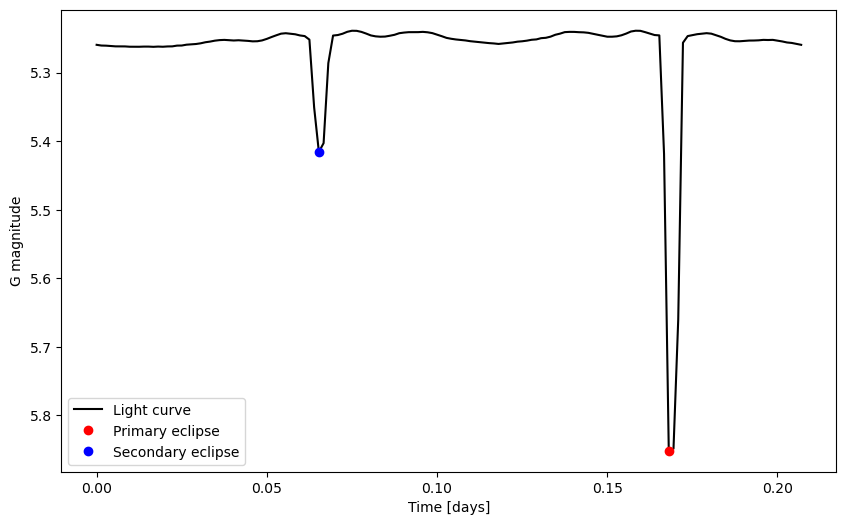

In [7]:
# Find the time of primary and secondary eclipse by looking at the light curve minima
mag_g_array = np.array(mag_g)
primary_eclipse_idx = np.argmax(mag_g_array)
secondary_eclipse_idx = np.argmax(mag_g_array[:int(len(mag_g)/2)])

primary_eclipse_time = times[primary_eclipse_idx]
secondary_eclipse_time = times[secondary_eclipse_idx]

print(f"Primary eclipse time: {primary_eclipse_time:.3f} days")
print(f"Secondary eclipse time: {secondary_eclipse_time:.3f} days")

# Plot the light curve with eclipse points marked
plt.figure(figsize=(10, 6))
plt.plot(times, mag_g_array, 'k-', label='Light curve')
plt.plot(primary_eclipse_time, mag_g_array[primary_eclipse_idx], 'ro', label='Primary eclipse')
plt.plot(secondary_eclipse_time, mag_g_array[secondary_eclipse_idx], 'bo', label='Secondary eclipse')
plt.xlabel('Time [days]')
plt.ylabel('G magnitude')
plt.legend()
plt.gca().invert_yaxis()


In [8]:
wavelengths = data['wavelengths']
spectra1 = data['spectra_body1']
spectra2 = data['spectra_body2']

In [9]:
primary_eclipse_idx, secondary_eclipse_idx

(121, 47)

In [10]:
from spice.plots import plot_3D_binary

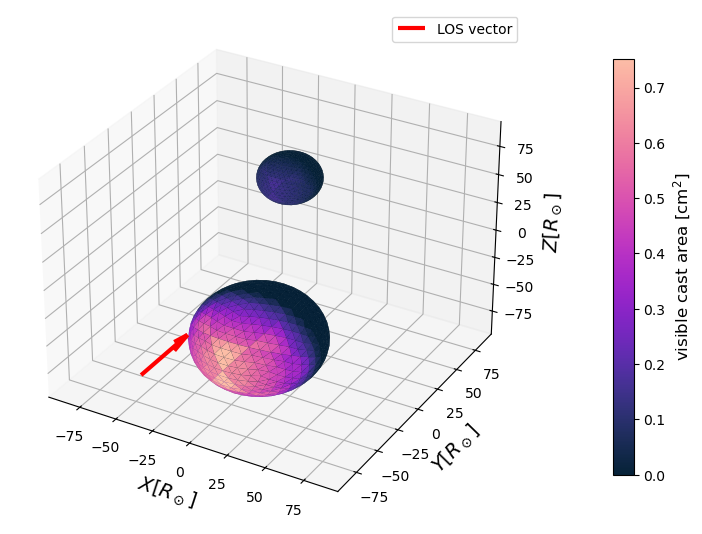

In [21]:
fig, _ = plot_3D_binary(pb1[0], pb2[0], scale_radius=5, draw_rotation_axes=False, property='visible_cast_areas');
fig.savefig('../paper_plots/tz_fornacis/tz_fornacis_model_t=0.png', dpi=300, bbox_inches='tight')

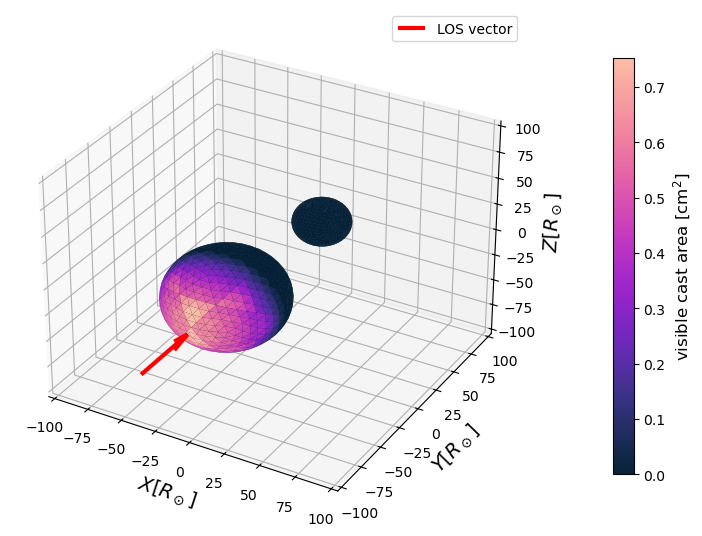

In [22]:
fig, _ = plot_3D_binary(pb1[primary_eclipse_idx], pb2[primary_eclipse_idx], scale_radius=5, draw_rotation_axes=False, property='visible_cast_areas');
fig.savefig('../paper_plots/tz_fornacis/tz_fornacis_model_primary_eclipse.png', dpi=300, bbox_inches='tight')

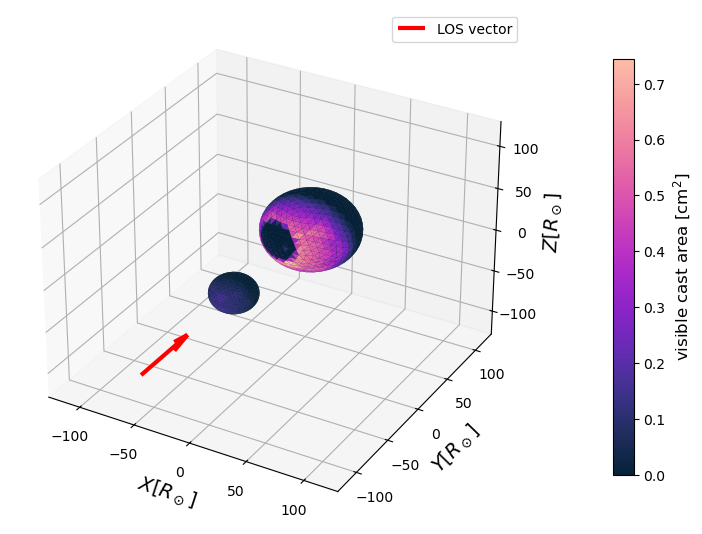

In [23]:
fig, _ = plot_3D_binary(pb1[secondary_eclipse_idx], pb2[secondary_eclipse_idx], scale_radius=5, draw_rotation_axes=False, property='visible_cast_areas');
fig.savefig('../paper_plots/tz_fornacis/tz_fornacis_model_secondary_eclipse.png', dpi=300, bbox_inches='tight')

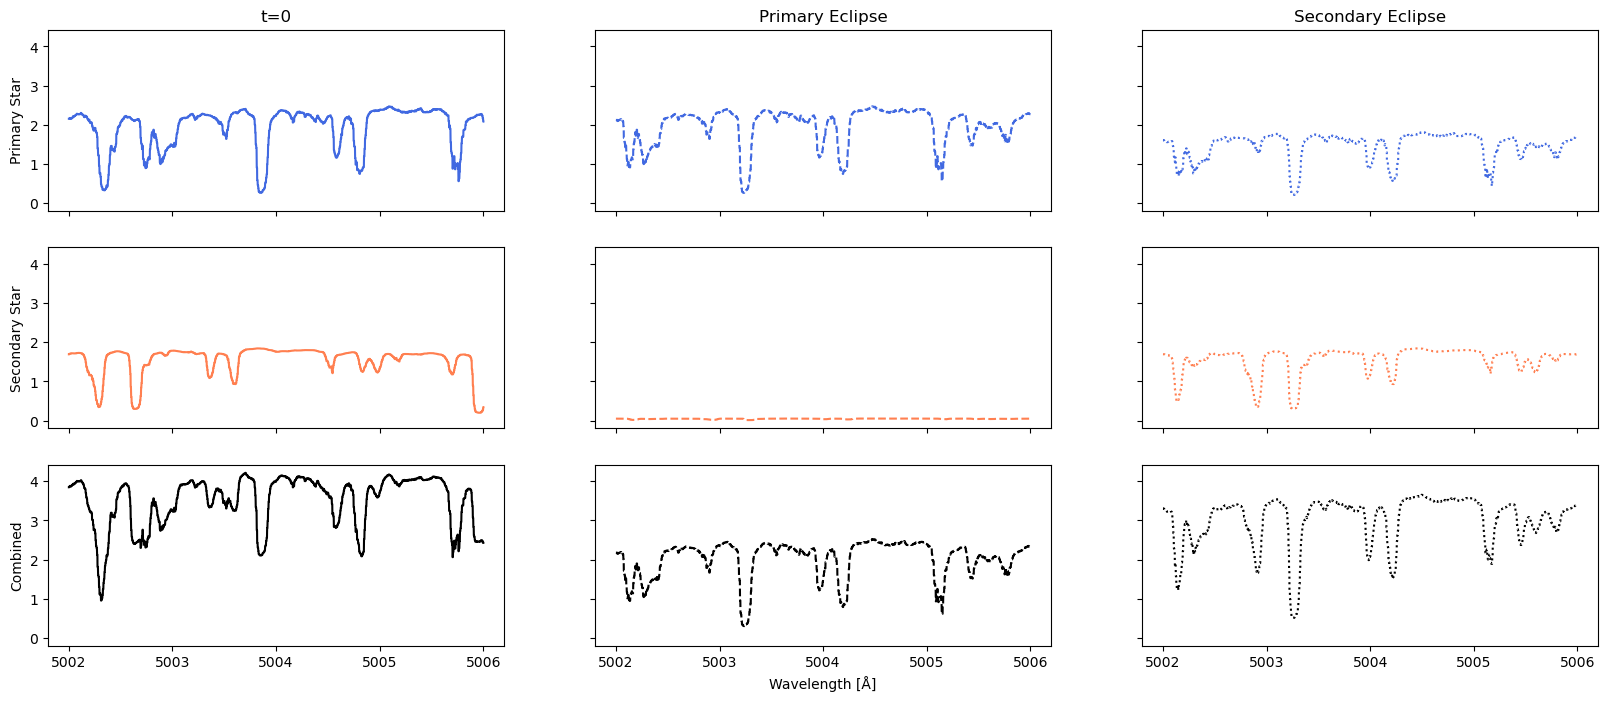

In [25]:
# Create a figure with three subplots for the spectra
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=3, figsize=(20, 8), sharex=True, sharey=True)

s1, s2 = spectra1[0], spectra2[0]
time = data['times'][0]

# Plot individual spectra with labels for legend
ax1[0].plot(wavelengths, s1[:, 0], color='royalblue')
ax2[0].plot(wavelengths, s2[:, 0], color='coral')
# Plot combined spectrum
ax3[0].plot(wavelengths, s1[:, 0] + s2[:, 0], color='black', label='Initial')

i = primary_eclipse_idx
s1, s2 = spectra1[i], spectra2[i]
time = data['times'][i]
ax1[1].plot(wavelengths, s1[:, 0], color='royalblue', linestyle='--')
ax2[1].plot(wavelengths, s2[:, 0], color='coral', linestyle='--')
# Plot combined spectrum
ax3[1].plot(wavelengths, s1[:, 0] + s2[:, 0], color='black', linestyle='--', label='Primary Eclipse')

i = secondary_eclipse_idx
s1, s2 = spectra1[i], spectra2[i]
time = data['times'][i]
ax1[2].plot(wavelengths, s1[:, 0], color='royalblue', linestyle='dotted')
ax2[2].plot(wavelengths, s2[:, 0], color='coral', linestyle='dotted')
# Plot combined spectrum
ax3[2].plot(wavelengths, s1[:, 0] + s2[:, 0], color='black', linestyle='dotted', label='Secondary Eclipse')

ax1[0].set_title('t=0')
ax1[1].set_title('Primary Eclipse')
ax1[2].set_title('Secondary Eclipse')

# Add labels and titles
# ax1.set_title('Primary Star Spectrum')
# ax2.set_title('Secondary Star Spectrum')
# ax3.set_title('Combined Spectrum')

ax2[0].set_ylabel('Normalized Flux')
ax3[1].set_xlabel('Wavelength [Å]')

ax1[0].set_ylabel('Primary Star')
ax2[0].set_ylabel('Secondary Star') 
ax3[0].set_ylabel('Combined')

ax1[0].set_xticks(np.arange(5002, 5007, 1))

In [26]:
fig.savefig('../paper_plots/tz_fornacis/tz_fornacis_spectra.png', dpi=300, bbox_inches='tight')